<a href="https://colab.research.google.com/github/jyimz/Python/blob/main/Analyzing_Fish_Market_Dynamics_A_Data_Driven_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("fulton.csv")
df.head()

,Mon,Tue,Wed,Thu,Date,Stormy,p,q
0,1,0,0,0,1,1,1.569217,8.994421
1,0,1,0,0,2,1,2.000000,7.707063
2,0,0,1,0,3,0,2.072321,8.350194
3,0,0,0,1,4,1,2.247139,8.656955
4,0,0,0,0,5,1,2.664327,7.844241


1)

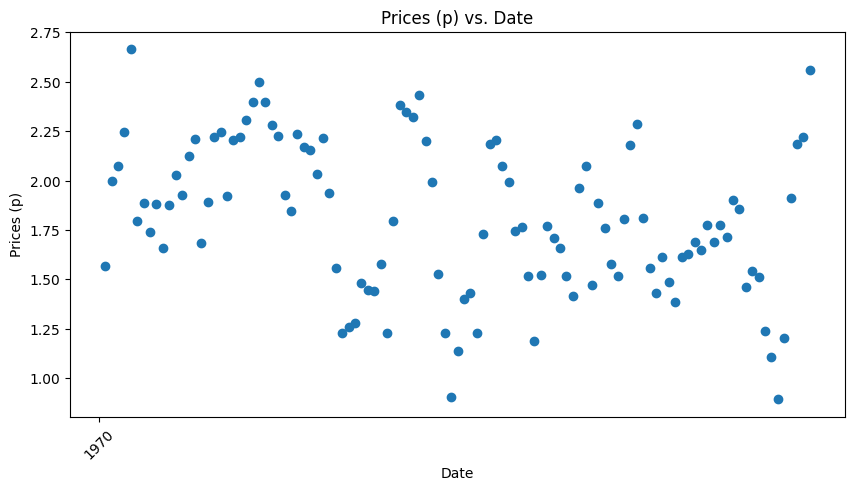

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("fulton.csv")

# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Scatter plot for prices vs. date
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['p'])
plt.title('Prices (p) vs. Date')
plt.xlabel('Date')
plt.ylabel('Prices (p)')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


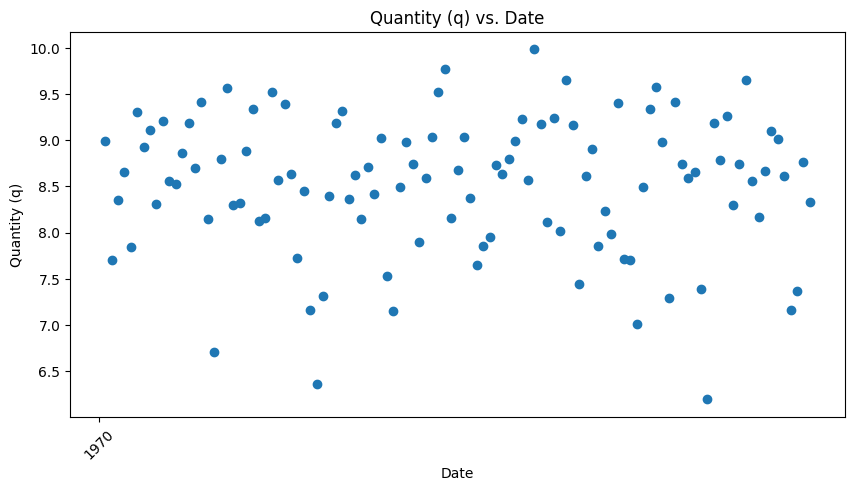

In [ ]:
# Scatter plot for quantity vs. date
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['q'])
plt.title('Quantity (q) vs. Date')
plt.xlabel('Date')
plt.ylabel('Quantity (q)')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()


1a). The scatter plots show a decrease in price when quantity goes up and an increase in price quantity down.

1b). Based on the calculated averages, fish are sold for the highest price on Thursday, with an average price (p) of 1.868.

Demand for fish could be higher towards the end of the week, possibly due to consumer shopping habits or preparation for weekend events.

Another factor could be weather. Since the dataset includes a variable for stormy weather two days prior, weather conditions might indirectly affect fishing activities and, subsequently, fish prices.

In [ ]:
# Calculating the average price and quantity for each weekday

# Calculating the average price (p) for each weekday
avg_price_mon = df[df['Mon'] == 1]['p'].mean()
avg_price_tue = df[df['Tue'] == 1]['p'].mean()
avg_price_wed = df[df['Wed'] == 1]['p'].mean()
avg_price_thu = df[df['Thu'] == 1]['p'].mean()

# Calculating the average quantity (q) for each weekday
avg_quantity_mon = df[df['Mon'] == 1]['q'].mean()
avg_quantity_tue = df[df['Tue'] == 1]['q'].mean()
avg_quantity_wed = df[df['Wed'] == 1]['q'].mean()
avg_quantity_thu = df[df['Thu'] == 1]['q'].mean()

# Creating a DataFrame to display the results
avg_values = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
    'Average Price (p)': [avg_price_mon, avg_price_tue, avg_price_wed, avg_price_thu],
    'Average Quantity (q)': [avg_quantity_mon, avg_quantity_tue, avg_quantity_wed, avg_quantity_thu]
})

avg_values


,Day,Average Price (p),Average Quantity (q)
0,Monday,1.747336,8.763345
1,Tuesday,1.792573,8.207339
2,Wednesday,1.798947,8.164622
3,Thursday,1.868307,8.762598


In [ ]:
import statsmodels.api as sm

# Preparing the data for linear regression
# Dropping the 'Stormy' and 'Date' variables
X = df.drop(['Stormy', 'Date', 'q'], axis=1)
y = df['q']

# Adding an intercept to the model
X = sm.add_constant(X)

# Building the linear regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           7.08e-05
Time:                        08:08:00   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7320      0.336     28.936      0.000       9.065      10.399
Mon            0.0143      0.203      0.071      0.944      -0.387       0.416
Tue           -0.5162      0.198     -2.611      0.010      -0.908      -0.124
Wed           -0.5554      0.202     -2.745      0.007      -0.957      -0.154
Thu            0.0816      0.198      0.413      0.681      -0.311       0.474
p             -0.5625      0.168     -3.344      0.001      -0.896      -0.229
==============================================================================
Omnibus:                       14.325   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.876
Skew:                          -0.804   Prob(JB):                     0.000357
Kurtosis:                       3.920   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2a). q = 9.7320 + 0.0143 * Mon + -0.5162 * Tue + -0.5554 * Wed + 0.0816 * Thu + -0.5625 * p

R-squared Value: The R-squared value of the model is 0.220. This means that approximately 22% of the variance in the dependent variable (quantity of fish sold, q)


q) is explained by the independent variables in the model. While this provides some explanatory power, it also suggests that a significant portion of the variance in q is not explained by these variables, indicating that other factors might be influencing the quantity of fish sold.

Significance of Independent Variables:

Mon (Monday): The coefficient for Monday is not statistically significant (p-value = 0.944), suggesting that being Monday does not have a significant impact on the quantity of fish sold compared to the baseline (which could be any day not included in the model).

Tue (Tuesday): The coefficient for Tuesday is statistically significant (p-value = 0.010), indicating that being Tuesday has a significant negative impact on the quantity of fish sold compared to the baseline.

Wed (Wednesday): The coefficient for Wednesday is also statistically significant (p-value = 0.007), showing a significant negative impact on the quantity of fish sold compared to the baseline.

Thu (Thursday): The coefficient for Thursday is not statistically significant (p-value = 0.681), suggesting that being Thursday does not significantly impact the quantity of fish sold compared to the baseline.

p (Price): The price variable has a statistically significant negative relationship with the quantity of fish sold (p-value = 0.001). This means that as the price increases, the quantity of fish sold tends to decrease.

2c). The coefficient of price (p) in the linear regression model is -0.5625. This coefficient represents the estimated change in the quantity of fish sold (q) for a one-unit increase in the transformed price (p, which is log[prices] + 2), holding all other variables constant.

Yes, we can use this coefficient to estimate the effect of a change in prices on the quantity sold.

The negative coefficient of -0.5625 indicates that as the price increases, the quantity of fish sold decreases. Specifically, for each one-unit increase in p, the quantity sold (q) is expected to decrease by 0.5625 units.



3a). The instrument must satisfy two key properties: relevance and exogeneity.

The relevance criterion requires that the instrument (two-day lagged weather) be correlated with the endogenous explanatory variable (p). Stormy weather could disrupt fishing, leading to reduced supply and consequently higher prices. Thus, the two-day lagged weather can be a strong predictor of current prices, satisfying the relevance criterion.

The exogeneity criterion requires that the instrument must not be correlated with the error term in the regression equation. The instrument should not directly affect the dependent variable (q, quantity sold) except through its effect on the endogenous explanatory variable (p). Weather conditions from two days ago are unlikely to have a direct impact on today's fish quantity sold, except through their effect on supply and thus on prices.

By satisfying both relevance and exogeneity, two-day lagged weather appears to be a good instrument for price in the context of this analysis.

3b). Two-day lagged weather is a strong candidate for an instrument in estimating the causal effect of price on quantity sold.

If consumers anticipate bad weather and its impact on fish availability, they might alter their purchasing habits. For instance, expecting fewer fish due to stormy weather two days ago, consumers might either rush to buy more fish before the storm hits or reduce their purchases, anticipating higher prices or lower quality.

Weather conditions might influence fishing schedules in a way that affects supply beyond the immediate two-day window. For example, anticipating a series of stormy days, fishermen might alter their schedules, impacting the fish supply and, consequently, the quantity sold.

The two-day lagged weather might have a direct effect on the quantity of fish sold, independent of its effect through price changes. This potential violation of the exogeneity criterion would need to be carefully considered and addressed in any causal analysis using two-day lagged weather as an instrument for price.

3c).

In [ ]:
!pip install linearmodels #!pip install NAME_OF_PACKAGE

In [ ]:
from linearmodels.iv import IV2SLS

In [ ]:
df.head()

,Mon,Tue,Wed,Thu,Date,Stormy,p,q
0,1,0,0,0,1970-01-01 00:00:00.000000001,1,1.569217,8.994421
1,0,1,0,0,1970-01-01 00:00:00.000000002,1,2.000000,7.707063
2,0,0,1,0,1970-01-01 00:00:00.000000003,0,2.072321,8.350194
3,0,0,0,1,1970-01-01 00:00:00.000000004,1,2.247139,8.656955
4,0,0,0,0,1970-01-01 00:00:00.000000005,1,2.664327,7.844241


In [ ]:
iv_regression  = IV2SLS.from_formula("Stormy ~ Thu + Mon + Tue + Wed + Thu + [p ~ q] ", data=df)

In [ ]:
result_iv = iv_regression.fit()

In [ ]:
print(result_iv) # there is no summary function

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 Stormy   R-squared:                      0.3480
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3173
No. Observations:                 111   F-statistic:                    47.936
Date:                Sat, Dec 09 2023   P-value (F-stat)                0.0000
Time:                        09:47:05   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Thu            0.0320     0.1272     0.2516     0.8013     -0.2174      0.2814
Mon            0.1669     0.1350     1.2364     0.21

3d). The coefficient of price (p) in the IV regression model changed to -0.0851, compared to -0.5625 in the original OLS regression model.

This change in the coefficient indicates a decrease in the magnitude of the effect of price on quantity.

3e). Stormy = 0.0320 * Thu + 0.1669 * Mon + 0.0848 * Tue + 0.0177 * Wed + 0.1225 * p


4a).

In [ ]:
# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Set the values
day_values = {
    "Mon": 1,
    "Thu": 0,
    "Tue": 0,
    "Wed": 0
}
price = 0.1

# Calculate the quantity using the regression model
quantity = sum(coefficients[day] * day_values[day] for day in day_values.keys()) + coefficients["p"] * price

# Calculate the revenue on Monday
revenue = price * quantity

print(f"Quantity on Monday: {quantity}")
print(f"Revenue on Monday: {revenue}")


Quantity on Monday: 0.17915
Revenue on Monday: 0.017915


4b).

In [ ]:
import numpy as np

# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Create an array of prices from 0 to 6 with an increment of 0.01
prices = np.arange(0, 6.01, 0.01)

# Initialize an empty list to store revenue values
revenues = []

# Set the day of the week to Monday (Mon = 1) for this calculation
day_values = {
    "Mon": 1,
    "Thu": 0,
    "Tue": 0,
    "Wed": 0
}

# Calculate revenue for each price value
for price in prices:
    # Calculate the quantity using the regression model
    quantity = sum(coefficients[day] * day_values[day] for day in day_values.keys()) + coefficients["p"] * price

    # Calculate the revenue
    revenue = price * quantity

    # Append the revenue to the list
    revenuesappend = revenues.append(revenue)

# Now, the 'revenues' list contains the calculated revenue for each price value
print(quantity)
print(revenue)
print(revenues)

0.9018999999999999
5.4113999999999995
[0.0, 0.00168125, 0.0033870000000000003, 0.00511725, 0.006872, 0.00865125, 0.010454999999999999, 0.01228325, 0.014136, 0.01601325, 0.017915, 0.019841249999999998, 0.021792, 0.02376725, 0.025767, 0.02779125, 0.029840000000000002, 0.031913250000000004, 0.034011, 0.03613325, 0.03828, 0.040451249999999994, 0.042647, 0.044867250000000004, 0.047112, 0.04938125, 0.051675, 0.05399325, 0.056336000000000004, 0.05870324999999999, 0.061095, 0.06351125, 0.065952, 0.06841725, 0.070907, 0.07342125000000001, 0.07596, 0.07852325, 0.081111, 0.08372325, 0.08635999999999999, 0.08902125000000001, 0.091707, 0.09441725, 0.097152, 0.09991125000000001, 0.10269500000000001, 0.10550324999999999, 0.10833599999999999, 0.11119325, 0.114075, 0.11698125, 0.119912, 0.12286725000000001, 0.125847, 0.12885125000000003, 0.13188, 0.13493325000000003, 0.138011, 0.14111324999999997, 0.14424, 0.14739124999999997, 0.150567, 0.15376725, 0.156992, 0.16024125, 0.163515, 0.16681325000000002, 0

4c). Monday

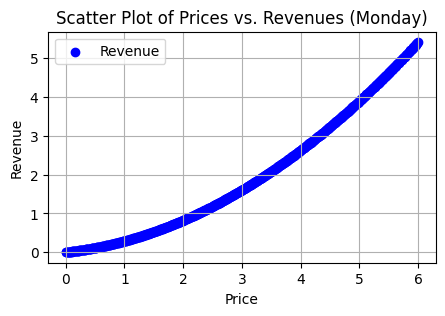

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Create an array of prices from 0 to 6 with an increment of 0.01
prices = np.arange(0, 6.01, 0.01)

# Initialize an empty list to store revenue values
revenues = []

# Set the day of the week to Monday (Mon = 1) for this calculation
day_values = {
    "Mon": 1,
    "Thu": 0,
    "Tue": 0,
    "Wed": 0
}

# Calculate revenue for each price value
for price in prices:
    # Calculate the quantity using the regression model
    quantity = sum(coefficients[day] * day_values[day] for day in day_values.keys()) + coefficients["p"] * price

    # Calculate the revenue
    revenue = price * quantity

    # Append the revenue to the list
    revenues.append(revenue)

# Create a scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(prices, revenues, label='Revenue', color='b', marker='o')
plt.title('Scatter Plot of Prices vs. Revenues (Monday)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


 it looks like the maximum revenue occurs at a price point around 1.2 to 1.4

4d). Tuesday

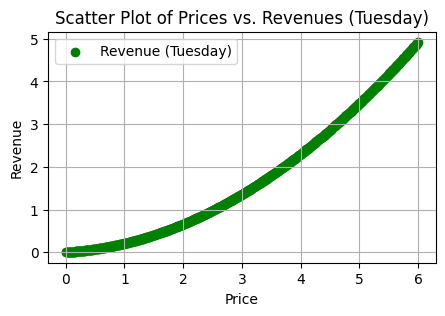

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Create an array of prices from 0 to 6 with an increment of 0.01
prices = np.arange(0, 6.01, 0.01)

# Initialize an empty list to store revenue values for Tuesday
revenues_tue = []

# Set the day of the week to Tuesday (Tue = 1) for this calculation
day_values_tue = {
    "Mon": 0,
    "Thu": 0,
    "Tue": 1,
    "Wed": 0
}

# Calculate revenue for each price value on Tuesday
for price in prices:
    # Calculate the quantity using the regression model for Tuesday
    quantity_tue = sum(coefficients[day] * day_values_tue[day] for day in day_values_tue.keys()) + coefficients["p"] * price

    # Calculate the revenue for Tuesday
    revenue_tue = price * quantity_tue

    # Append the revenue to the list for Tuesday
    revenues_tue.append(revenue_tue)

# Create a scatter plot for Tuesday
plt.figure(figsize=(5, 3))
plt.scatter(prices, revenues_tue, label='Revenue (Tuesday)', color='g', marker='o')
plt.title('Scatter Plot of Prices vs. Revenues (Tuesday)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()

# Show the plot for Tuesday
plt.show()


It appears that the optimal price for sellers on a Tuesday to maximize revenue falls within the price range of approximately 1.4 to 1.6

4d) Wednesday

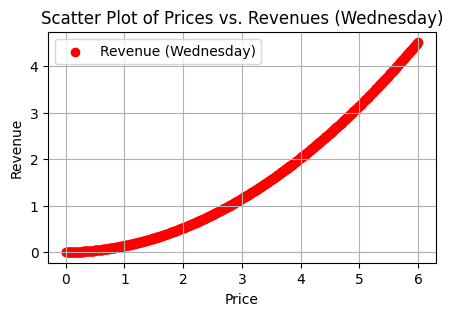

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Create an array of prices from 0 to 6 with an increment of 0.01
prices = np.arange(0, 6.01, 0.01)

# Initialize an empty list to store revenue values for Wednesday
revenues_wed = []

# Set the day of the week to Wednesday (Wed = 1) for this calculation
day_values_wed = {
    "Mon": 0,
    "Thu": 0,
    "Tue": 0,
    "Wed": 1
}

# Calculate revenue for each price value on Wednesday
for price in prices:
    # Calculate the quantity using the regression model for Wednesday
    quantity_wed = sum(coefficients[day] * day_values_wed[day] for day in day_values_wed.keys()) + coefficients["p"] * price

    # Calculate the revenue for Wednesday
    revenue_wed = price * quantity_wed

    # Append the revenue to the list for Wednesday
    revenues_wed.append(revenue_wed)

# Create a scatter plot for Wednesday
plt.figure(figsize=(5, 3))
plt.scatter(prices, revenues_wed, label='Revenue (Wednesday)', color='r', marker='o')
plt.title('Scatter Plot of Prices vs. Revenues (Wednesday)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()

# Show the plot for Wednesday
plt.show()


It appears that the optimal price for sellers on a Wednesday to maximize revenue falls within the price range of approximately 1.0 to 1.2

4d). Thursday

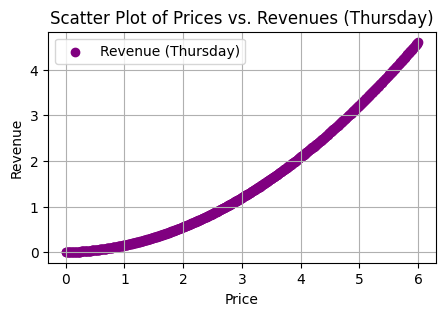

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients from the linear regression model
coefficients = {
    "Mon": 0.1669,
    "Thu": 0.0320,
    "Tue": 0.0848,
    "Wed": 0.0177,
    "p": 0.1225
}

# Create an array of prices from 0 to 6 with an increment of 0.01
prices = np.arange(0, 6.01, 0.01)

# Initialize an empty list to store revenue values for Thursday
revenues_thu = []

# Set the day of the week to Thursday (Thu = 1) for this calculation
day_values_thu = {
    "Mon": 0,
    "Thu": 1,
    "Tue": 0,
    "Wed": 0
}

# Calculate revenue for each price value on Thursday
for price in prices:
    # Calculate the quantity using the regression model for Thursday
    quantity_thu = sum(coefficients[day] * day_values_thu[day] for day in day_values_thu.keys()) + coefficients["p"] * price

    # Calculate the revenue for Thursday
    revenue_thu = price * quantity_thu

    # Append the revenue to the list for Thursday
    revenues_thu.append(revenue_thu)

# Create a scatter plot for Thursday
plt.figure(figsize=(5, 3))
plt.scatter(prices, revenues_thu, label='Revenue (Thursday)', color='purple', marker='o')
plt.title('Scatter Plot of Prices vs. Revenues (Thursday)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()

# Show the plot for Thursday
plt.show()


it appears that the optimal price for sellers on a Thursday to maximize revenue falls within the price range of approximately 1.4 to 1.6